In [1]:
from skimage import io

Duplicate key in file '/Users/parijatparimal/.matplotlib/matplotlibrc' line #2.


(992, 1328, 4)
(992, 1328, 4)


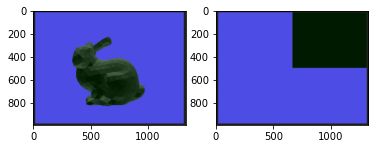

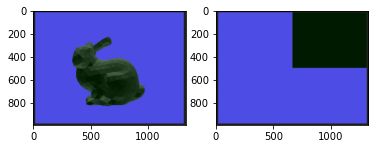

In [2]:
bunny = io.imread('bunny.png')
print(bunny.shape)
cube = io.imread('cube.png')
print(cube.shape)
io.imshow_collection([bunny, cube])

In [3]:
from scipy.fftpack import dct, idct
bunny_n = bunny / 255
print(type(bunny_n[0][0][0]))
cube_n = cube / 255
print(type(cube_n[0][0][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


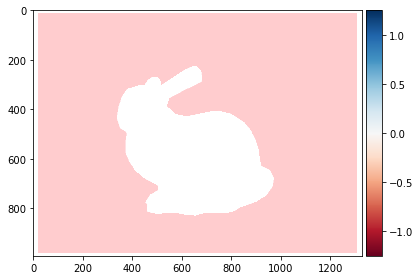

In [4]:
dct_bunny = dct(bunny_n, norm='ortho')
io.imshow(dct_bunny)

In [5]:
g = 0.01
new_dct = dct_bunny + g * cube_n

/Users/parijatparimal/opt/anaconda3/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


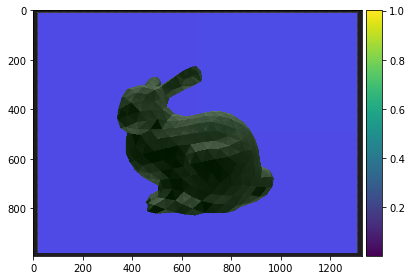

In [6]:
idct_bunny = idct(new_dct, norm='ortho')
io.imshow(idct_bunny)

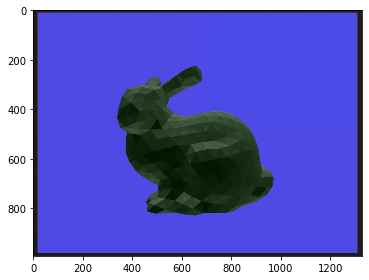

In [7]:
idct_bunny[:,:,3] = 1
io.imshow(idct_bunny)

In [8]:
print(bunny_n[135][234])
print(dct_bunny[135][234])
print(idct_bunny[135][234])

[0.30196078 0.30196078 0.90196078 1.        ]
[ 1.25294118 -0.61837492  0.04901961  0.20308084]
[0.31265903 0.29324507 0.9046765  1.        ]


In [9]:
from skimage import img_as_ubyte
#io.imsave('out.png',idct_bunny)
io.imsave('lossless.png', img_as_ubyte(idct_bunny))

In [10]:
lossless = io.imread('lossless.png')/255
placeholder_rgb = bunny_n
encrypted_rgb = io.imread('out.png')/255

encryption_parameter = 0.01

decrypted_rgb = (dct(encrypted_rgb, norm='ortho') - dct(placeholder_rgb, norm='ortho'))/encryption_parameter



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


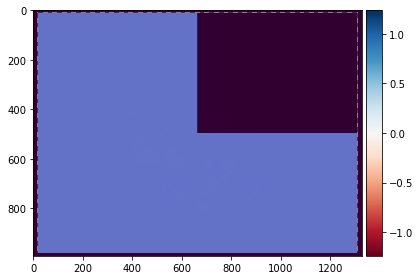

In [11]:
io.imshow(decrypted_rgb)

In [12]:
print("Placeholder  ",bunny_n[135][234], bunny_n[200,1000])
print("Encrypted    ",idct_bunny[135][234], idct_bunny[200,1000])
print("rgb enc file ",encrypted_rgb[135][234], encrypted_rgb[200,1000])
print("lossless rgb ",lossless[135][234], lossless[200,1000])
print("Hidden       ",cube_n[135][234], cube_n[200,1000])
print("Decrypted    ",decrypted_rgb[135][234], decrypted_rgb[200,1000])

Placeholder   [0.30196078 0.30196078 0.90196078 1.        ] [0.30196078 0.30196078 0.90196078 1.        ]
Encrypted     [0.31265903 0.29324507 0.9046765  1.        ] [0.30533286 0.29570387 0.9082177  1.        ]
rgb enc file  [0.31372549 0.29411765 0.90588235 1.        ] [0.30588235 0.29411765 0.90980392 1.        ]
lossless rgb  [0.31372549 0.29411765 0.90588235 1.        ] [0.30588235 0.29411765 0.90980392 1.        ]
Hidden        [0.30196078 0.30196078 0.90196078 1.        ] [0.         0.10196078 0.         1.        ]
Decrypted     [0.39215686 0.4502158  0.78431373 1.0869171 ] [ 0.19607843 -0.16827871  0.19607843  1.13087215]


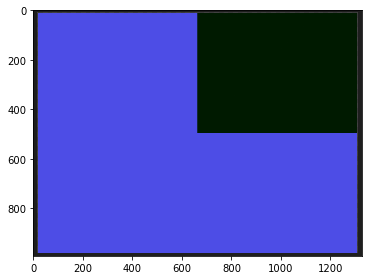

In [13]:
io.imshow(cube_n)

In [14]:
print(cube_n[:,:,range(3)].shape)

(992, 1328, 3)
